In [1]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus


In [2]:
text = """Research article Open Access
A computational analysis of protein-protein interaction networks in
neurodegenerative diseases
Joaquín Goñi1,2, Francisco J Esteban3, Nieves Vélez de Mendizábal1,4,
Jorge Sepulcre1, Sergio Ardanza-Trevijano2, Ion Agirrezabal1 and
Pablo Villoslada*1
Address: 1Neuroimmunology laboratory, Department of Neuroscience, Center for Applied Medical Research, University of Navarra, Spain,
2Department of Physics and Applied Mathematics, University of Navarra, Spain, 3Systems Biology Unit, Department of Experimental Biology,
University of Jaen, Spain and 4Department of Computational Sciences and Artificial Intelligence, University of the Basque Country, San Sebastian,
Spain
Email: Joaquín Goñi - jgoni@unav.es; Francisco J Esteban - festeban@ujaen.es; Nieves Vélez de Mendizábal - nvelez@unav.es;
Jorge Sepulcre - jsepulber@unav.es; Sergio Ardanza-Trevijano - sardanza@unav.es; Ion Agirrezabal - iagirrezabal@alumni.unav.es;
Pablo Villoslada* - pvilloslada@unav.es
* Corresponding author
Abstract
Background: Recent developments have meant that network theory is making an important
contribution to the topological study of biological networks, such as protein-protein interaction
(PPI) networks. The identification of differentially expressed genes in DNA array experiments is a
source of information regarding the molecular pathways involved in disease. Thus, considering PPI
analysis and gene expression studies together may provide a better understanding of multifactorial
neurodegenerative diseases such as Multiple Sclerosis (MS) and Alzheimer disease (AD). The aim
of this study was to assess whether the parameters of degree and betweenness, two fundamental
measures in network theory, are properties that differentiate between implicated (seed-proteins)
and non-implicated nodes (neighbors) in MS and AD. We used experimentally validated PPI
information to obtain the neighbors for each seed group and we studied these parameters in four
networks: MS-blood network; MS-brain network; AD-blood network; and AD-brain network.
Results: Specific features of seed-proteins were revealed, whereby they displayed a lower average
degree in both diseases and tissues, and a higher betweenness in AD-brain and MS-blood networks.
Additionally, the heterogeneity of the processes involved indicate that these findings are not
pathway specific but rather that they are spread over different pathways.
Conclusion: Our findings show differential centrality properties of proteins whose gene
expression is impaired in neurodegenerative diseases.
Background
The structural and functional relationships underlying the
organization of living systems imply the need to coordinate
molecular interactions, principally those involving
gene expression and protein activity. Although the
genome in each cell of a given organism is virtually the
Published: 20 June 2008
BMC Systems Biology 2008, 2:52 doi:10.1186/1752-0509-2-52
Received: 9 December 2007
Accepted: 20 June 2008
This article is available from: http://www.biomedcentral.com/1752-0509/2/52
© 2008 Goñi et al; licensee BioMed Central Ltd.
This is an Open Access article distributed under the terms of the Creative Commons Attribution License (http://creativecommons.org/licenses/by/2.0),
"""

In [3]:
text


'Research article Open Access\nA computational analysis of protein-protein interaction networks in\nneurodegenerative diseases\nJoaquín Goñi1,2, Francisco J Esteban3, Nieves Vélez de Mendizábal1,4,\nJorge Sepulcre1, Sergio Ardanza-Trevijano2, Ion Agirrezabal1 and\nPablo Villoslada*1\nAddress: 1Neuroimmunology laboratory, Department of Neuroscience, Center for Applied Medical Research, University of Navarra, Spain,\n2Department of Physics and Applied Mathematics, University of Navarra, Spain, 3Systems Biology Unit, Department of Experimental Biology,\nUniversity of Jaen, Spain and 4Department of Computational Sciences and Artificial Intelligence, University of the Basque Country, San Sebastian,\nSpain\nEmail: Joaquín Goñi - jgoni@unav.es; Francisco J Esteban - festeban@ujaen.es; Nieves Vélez de Mendizábal - nvelez@unav.es;\nJorge Sepulcre - jsepulber@unav.es; Sergio Ardanza-Trevijano - sardanza@unav.es; Ion Agirrezabal - iagirrezabal@alumni.unav.es;\nPablo Villoslada* - pvilloslada@unav

In [5]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# Passing the string text into word tokenize for breaking the sentences
token = word_tokenize(text)
token


[nltk_data] Downloading package punkt to /Users/pm286/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Research',
 'article',
 'Open',
 'Access',
 'A',
 'computational',
 'analysis',
 'of',
 'protein-protein',
 'interaction',
 'networks',
 'in',
 'neurodegenerative',
 'diseases',
 'Joaquín',
 'Goñi1,2',
 ',',
 'Francisco',
 'J',
 'Esteban3',
 ',',
 'Nieves',
 'Vélez',
 'de',
 'Mendizábal1,4',
 ',',
 'Jorge',
 'Sepulcre1',
 ',',
 'Sergio',
 'Ardanza-Trevijano2',
 ',',
 'Ion',
 'Agirrezabal1',
 'and',
 'Pablo',
 'Villoslada',
 '*',
 '1',
 'Address',
 ':',
 '1Neuroimmunology',
 'laboratory',
 ',',
 'Department',
 'of',
 'Neuroscience',
 ',',
 'Center',
 'for',
 'Applied',
 'Medical',
 'Research',
 ',',
 'University',
 'of',
 'Navarra',
 ',',
 'Spain',
 ',',
 '2Department',
 'of',
 'Physics',
 'and',
 'Applied',
 'Mathematics',
 ',',
 'University',
 'of',
 'Navarra',
 ',',
 'Spain',
 ',',
 '3Systems',
 'Biology',
 'Unit',
 ',',
 'Department',
 'of',
 'Experimental',
 'Biology',
 ',',
 'University',
 'of',
 'Jaen',
 ',',
 'Spain',
 'and',
 '4Department',
 'of',
 'Computational',
 'Sciences

In [6]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist


FreqDist({',': 29, 'of': 21, 'and': 16, 'the': 13, ':': 12, 'in': 10, ';': 10, '.': 10, '-': 7, '@': 7, ...})

In [7]:
# To find the frequency of top 10 words
fdist1 = fdist.most_common(10)
fdist1

[(',', 29),
 ('of', 21),
 ('and', 16),
 ('the', 13),
 (':', 12),
 ('in', 10),
 (';', 10),
 ('.', 10),
 ('-', 7),
 ('@', 7)]

In [9]:
# Stemming usually refers to normalizing words into its base form or root form.
# Importing Porterstemmer from nltk library
# Checking for the word ‘giving’ 
from nltk.stem import PorterStemmer
pst = PorterStemmer()

# Checking for the list of words
stm = ["waited", "waiting", "waits"]
for word in stm :
   print(word+ ":" +pst.stem(word))


waited:wait
waiting:wait
waits:wait


In [15]:
# Importing LancasterStemmer from nltk
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
stm1 = ["giving", "given", "given", "gave"]
for word in stm1 :
 print(word+ ":" +lst.stem(word))
 

giving:giv
given:giv
given:giv
gave:gav


In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

 
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora"))


[nltk_data] Downloading package wordnet to /Users/pm286/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


rocks : rock
corpora : corpus


In [22]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

a = set(stopwords.words('english'))
text = "Recent developments have meant that network theory is making an important contribution to the topological study of biological networks, such as protein-protein interaction (PPI) networks. "
text1 = word_tokenize(text.lower())
print(text1)
stopwords = [x for x in text1 if x not in a]
print(stopwords)


['recent', 'developments', 'have', 'meant', 'that', 'network', 'theory', 'is', 'making', 'an', 'important', 'contribution', 'to', 'the', 'topological', 'study', 'of', 'biological', 'networks', ',', 'such', 'as', 'protein-protein', 'interaction', '(', 'ppi', ')', 'networks', '.']
['recent', 'developments', 'meant', 'network', 'theory', 'making', 'important', 'contribution', 'topological', 'study', 'biological', 'networks', ',', 'protein-protein', 'interaction', '(', 'ppi', ')', 'networks', '.']


[nltk_data] Downloading package stopwords to /Users/pm286/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
#Tokenize the text
nltk.download('averaged_perceptron_tagger')
tex = word_tokenize(text)
for token in tex:
    print(nltk.pos_tag([token]))



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pm286/nltk_data...


[('Recent', 'NN')]
[('developments', 'NNS')]
[('have', 'VB')]
[('meant', 'NN')]
[('that', 'IN')]
[('network', 'NN')]
[('theory', 'NN')]
[('is', 'VBZ')]
[('making', 'VBG')]
[('an', 'DT')]
[('important', 'JJ')]
[('contribution', 'NN')]
[('to', 'TO')]
[('the', 'DT')]
[('topological', 'JJ')]
[('study', 'NN')]
[('of', 'IN')]
[('biological', 'JJ')]
[('networks', 'NNS')]
[(',', ',')]
[('such', 'JJ')]
[('as', 'IN')]
[('protein-protein', 'NN')]
[('interaction', 'NN')]
[('(', '(')]
[('PPI', 'NN')]
[(')', ')')]
[('networks', 'NNS')]
[('.', '.')]


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/pm286/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/pm286/nltk_data...
[nltk_data]   Package words is already up-to-date!


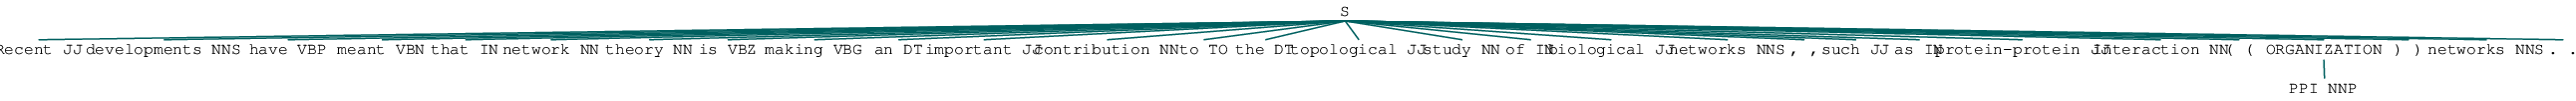

In [29]:
from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
# tokenize and POS Tagging before doing chunk
token = word_tokenize(text)
tags = nltk.pos_tag(token)
chunk = ne_chunk(tags)
chunk

In [39]:
token = word_tokenize(text)
token
tags = nltk.pos_tag(token)
reg = "NP: {<DT>?<JJ>*<NN>}" 
a = nltk.RegexpParser(reg)
result = a.parse(tags)
print(result)

(S (NP fruit/NN) flies/NNS like/IN (NP an/DT arrow/NN))


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
cv
# text_counts= cv.fit_transform(data['Phrase'])


CountVectorizer(stop_words='english',
                tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)